<a href="https://colab.research.google.com/github/kobayashi1987/Algorithmic_Trading_Machine_Learning/blob/main/CE301_python02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# First, import the Path class from pathlib
import os
from pathlib import Path
dir_path = '/content/drive/My Drive/CE301_Python/ce301_01'
files = os.listdir(dir_path)
print(files)


['CE301_python02.ipynb', 'example_folder', 'test00.ipynb']


In [3]:
# Get current working directory
current_dir = Path.cwd()
print(f"Current directory: {current_dir}")

Current directory: /content


In [4]:
# Create a file path

file_path = os.path.join(current_dir, 'drive', 'My Drive', 'CE301_Python', 'ce301_01')

print(f"Current directory: {file_path}")

Current directory: /content/drive/My Drive/CE301_Python/ce301_01


In [5]:
# Create a new directory
new_dir = Path('/content/drive/My Drive/CE301_Python/ce301_01/example_folder')
new_dir.mkdir(exist_ok=True)  # exist_ok=True prevents error if folder already exists

In [6]:
# Create a file path
file_path = new_dir / 'test.gdoc'
print(f"Current directory: {file_path}")

Current directory: /content/drive/My Drive/CE301_Python/ce301_01/example_folder/test.gdoc


In [ ]:
# Week 1: Stock Data Acquisition Setup

# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import datetime

# Step 1: Define Parameters for Data Acquisition
# Specify the stock ticker to fetch data (e.g., Apple, Google, Amazon)
stocks = ["AAPL", "GOOGL", "AMZN"]

# Set a date range to get historical data
start_date = "2020-01-01"
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

# Step 2: Define a function to get stock data for a given ticker
def get_stock_data(ticker, start_date, end_date):
    try:
        # Download historical market data from Yahoo Finance
        stock_data = yf.download(ticker, start=start_date, end=end_date)

        # Save the data as CSV for further analysis
        filename = f"{ticker}_stock_data.csv"
        stock_data.to_csv(filename)
        print(f"Data for {ticker} saved successfully to {filename}")

        return stock_data
    except Exception as e:
        print(f"An error occurred while fetching data for {ticker}: {e}")
        return None

# Step 3: Fetch data for each stock ticker
if __name__ == "__main__":
    # Create an empty dictionary to store stock data for each ticker
    stock_data_dict = {}

    for ticker in stocks:
        print(f"Fetching data for {ticker}...")
        stock_data_dict[ticker] = get_stock_data(ticker, start_date, end_date)

    # Display a success message
    print("Stock data fetching completed!")

# Step 4: Display basic information about the fetched data for each stock
for ticker, data in stock_data_dict.items():
    if data is not None:
        print(f"Summary for {ticker}:")
        print(data.describe())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for AAPL...
Data for AAPL saved successfully to AAPL_stock_data.csv
Fetching data for GOOGL...
Data for GOOGL saved successfully to GOOGL_stock_data.csv
Fetching data for AMZN...



[*********************100%***********************]  1 of 1 completed


Data for AMZN saved successfully to AMZN_stock_data.csv
Stock data fetching completed!
Summary for AAPL:
Price     Adj Close        Close         High          Low         Open  \
Ticker         AAPL         AAPL         AAPL         AAPL         AAPL   
count   1219.000000  1219.000000  1219.000000  1219.000000  1219.000000   
mean     149.716312   151.371452   152.928923   149.660416   151.242084   
std       39.726769    39.154458    39.313117    38.962947    39.156440   
min       54.569721    56.092499    57.125000    53.152500    57.020000   
25%      125.460331   128.000004   129.974998   126.730000   128.410004   
50%      149.414627   151.070007   153.089996   149.429993   150.949997   
75%      175.064171   176.279999   178.120003   174.745003   176.385002   
max      236.479996   236.479996   237.490005   234.449997   236.479996   

Price         Volume  
Ticker          AAPL  
count   1.219000e+03  
mean    9.202831e+07  
std     5.334595e+07  
min     2.404830e+07  
25%   

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


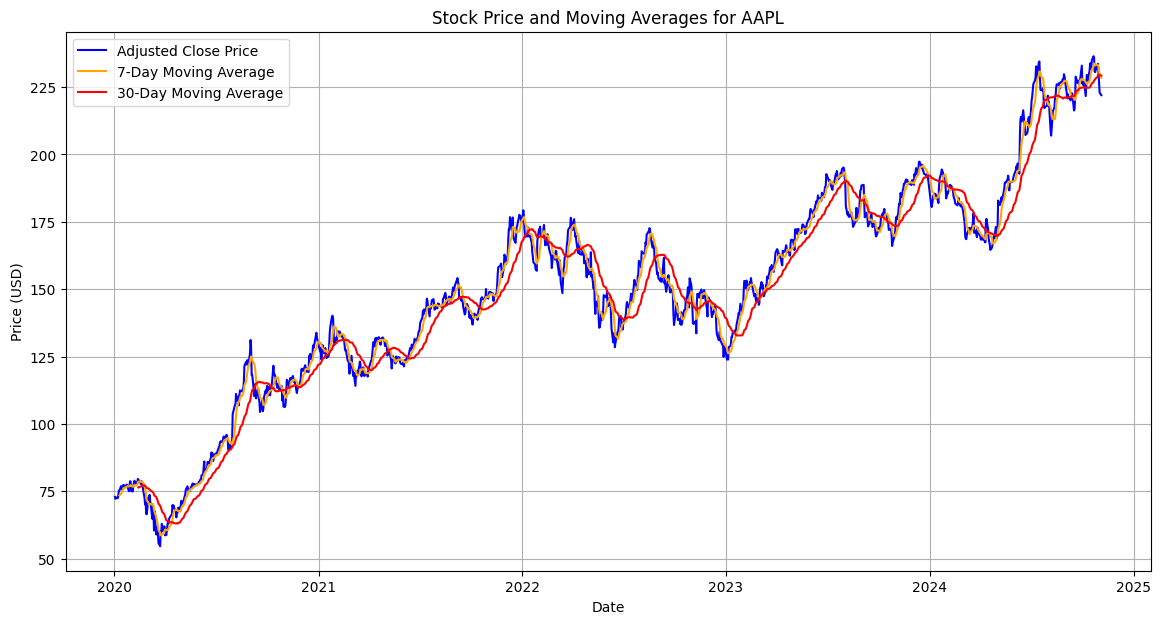

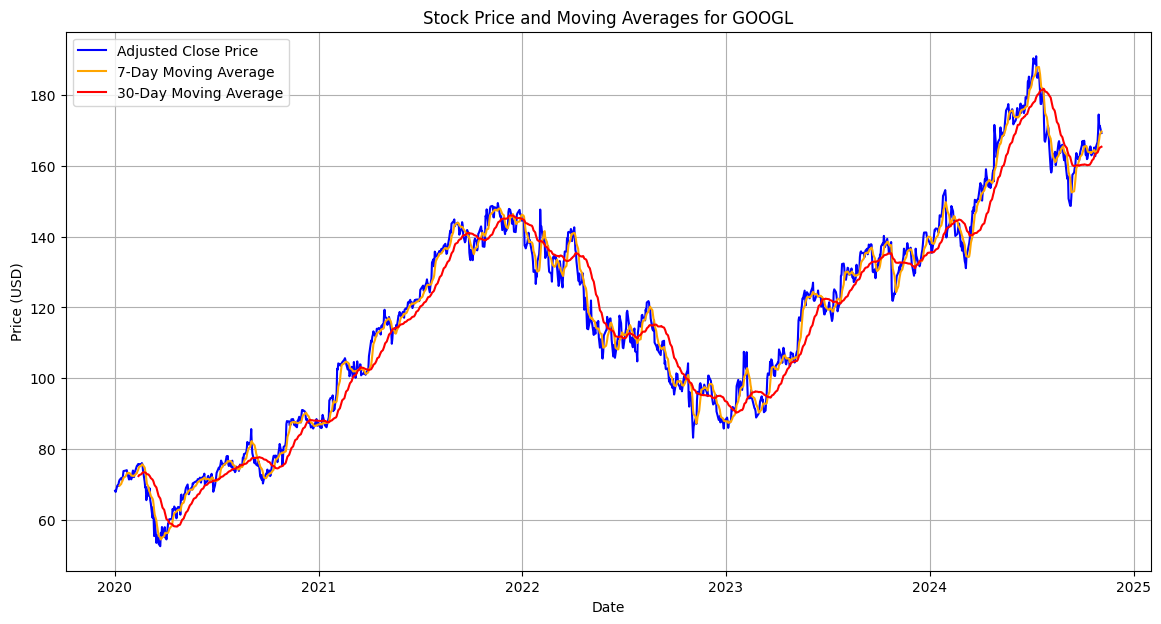

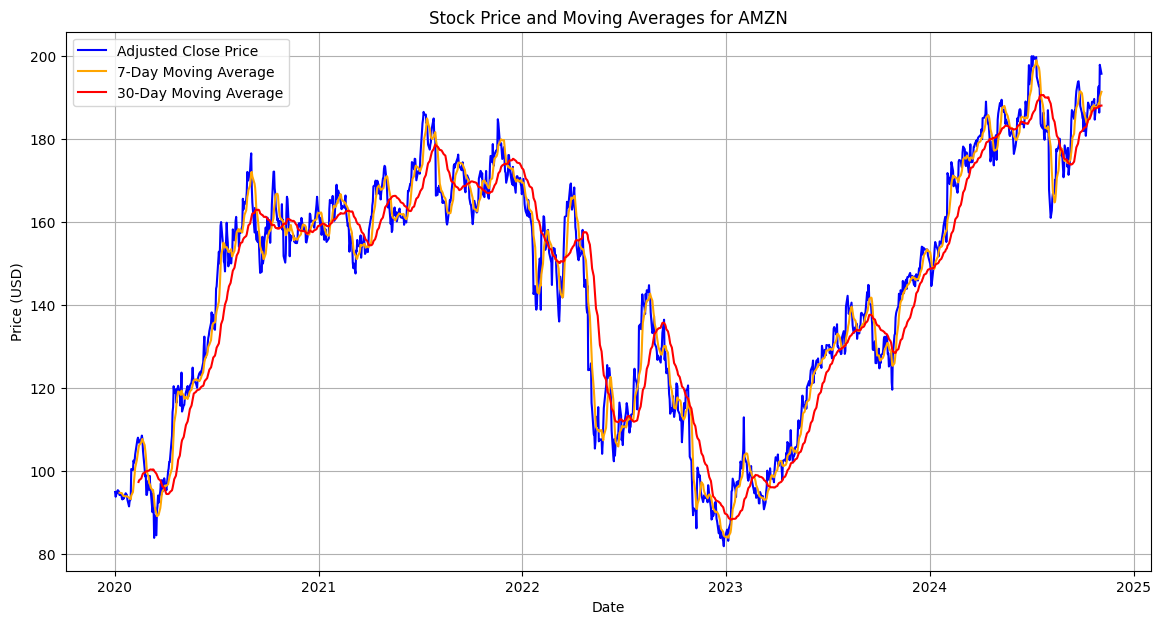

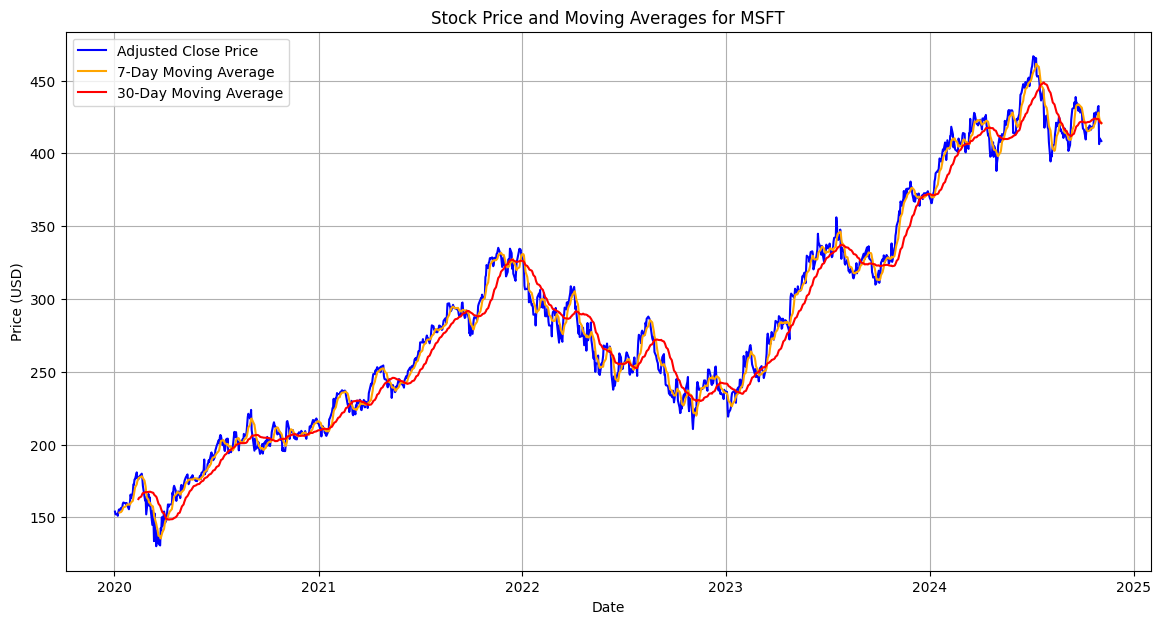

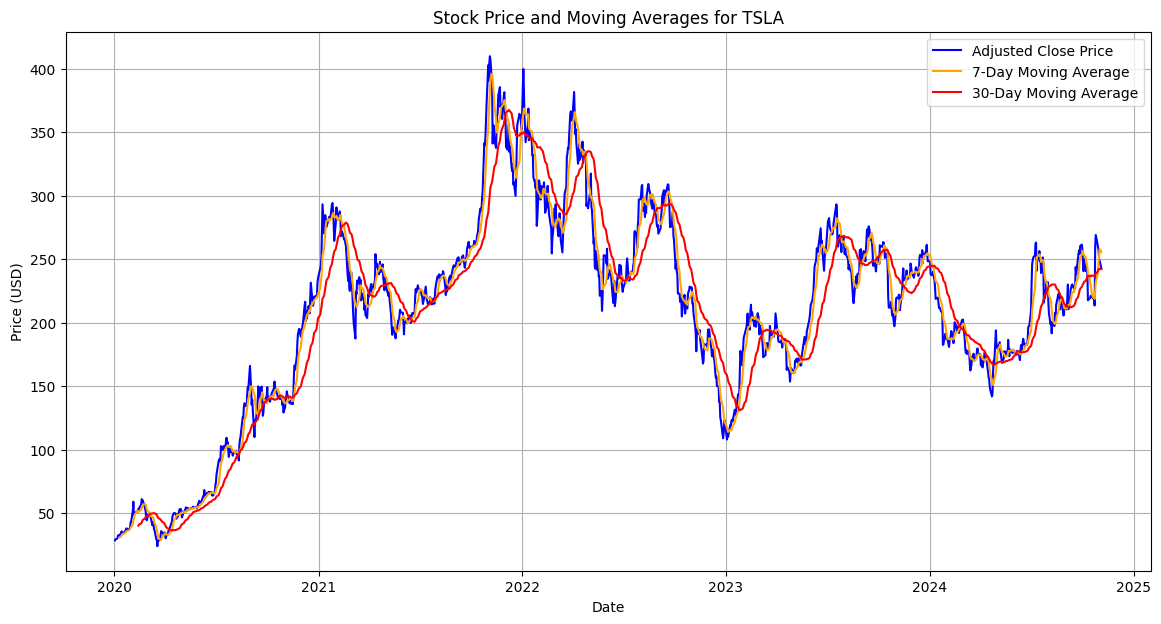

In [11]:
# Week 1: Stock Data Acquisition Setup

# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import os
import logging

# Set up logging configuration to log information, warnings, and errors
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s', handlers=[
    logging.FileHandler("stock_data_acquisition.log"),
    logging.StreamHandler()
])

# Step 1: Define Parameters for Data Acquisition
# Specify the stock tickers to fetch data (e.g., Apple, Google, Amazon)
stocks = ["AAPL", "GOOGL", "AMZN", "MSFT", "TSLA"]

# Set a date range to get historical data
start_date = "2020-01-01"
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

# Create a directory to store CSV files if it doesn't exist
output_dir = "stock_data"
os.makedirs(output_dir, exist_ok=True)

# Step 2: Define a function to get stock data for a given ticker
def get_stock_data(ticker, start_date, end_date):
    try:
        logging.info(f"Attempting to download data for {ticker} from {start_date} to {end_date}")

        # Download historical market data from Yahoo Finance
        stock_data = yf.download(ticker, start=start_date, end=end_date)

        # Check if the downloaded data is empty
        if stock_data.empty:
            logging.warning(f"No data found for {ticker}. Please check the ticker symbol or date range.")
        else:
            # Add additional calculated columns to the dataset
            stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()  # Calculate daily return
            stock_data['7-Day MA'] = stock_data['Adj Close'].rolling(window=7).mean()  # 7-day moving average
            stock_data['30-Day MA'] = stock_data['Adj Close'].rolling(window=30).mean()  # 30-day moving average
            stock_data['Volatility'] = stock_data['Adj Close'].rolling(window=7).std()  # 7-day rolling volatility
            logging.info(f"Successfully downloaded data for {ticker}. Number of rows: {len(stock_data)}")

        # Save the data as CSV for further analysis
        filename = os.path.join(output_dir, f"{ticker}_stock_data.csv")
        stock_data.to_csv(filename)
        logging.info(f"Data for {ticker} saved successfully to {filename}")

        # Return the fetched data
        return stock_data
    except Exception as e:
        # Log an error message in case of an exception during data fetching
        logging.error(f"An error occurred while fetching data for {ticker}: {e}")
        return None

# Step 3: Fetch data for each stock ticker
if __name__ == "__main__":
    # Create an empty dictionary to store stock data for each ticker
    stock_data_dict = {}

    # Loop through each ticker symbol in the stocks list
    for ticker in stocks:
        logging.info(f"Fetching data for {ticker}...")
        # Call the get_stock_data function to fetch data and store it in the dictionary
        stock_data_dict[ticker] = get_stock_data(ticker, start_date, end_date)
        logging.info(f"Completed fetching data for {ticker}.\n")

    # Display a success message after all tickers have been processed
    logging.info("Stock data fetching completed!")

# Step 4: Display basic information about the fetched data for each stock
for ticker, data in stock_data_dict.items():
    if data is not None:
        # Print a summary of basic statistical information for the fetched data
        logging.info(f"Summary for {ticker}: {data.describe()}")
    else:
        # Log a message if no data is available for the given ticker
        logging.warning(f"No data available for {ticker}, skipping summary.")

# Step 5: Perform Additional Analysis and Visualization
import matplotlib.pyplot as plt

# Plotting closing price and moving averages for each stock
def plot_stock_data(ticker, data):
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Adj Close'], label='Adjusted Close Price', color='blue')
    plt.plot(data.index, data['7-Day MA'], label='7-Day Moving Average', color='orange')
    plt.plot(data.index, data['30-Day MA'], label='30-Day Moving Average', color='red')


    # Ensure the values passed to fill_between are 1-dimensional by using the .to_numpy() method
    # plt.fill_between(data.index, (data['Adj Close'] - data['Volatility']).to_numpy(), (data['Adj Close'] + data['Volatility']).to_numpy(), color='gray', alpha=0.2, label='Volatility')

    plt.title(f"Stock Price and Moving Averages for {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid()
    plt.savefig(os.path.join(output_dir, f"{ticker}_stock_plot.png"))
    plt.show()

# Generate plots for each stock
for ticker, data in stock_data_dict.items():
    if data is not None:
        logging.info(f"Generating plot for {ticker}...")
        plot_stock_data(ticker, data)
        logging.info(f"Plot for {ticker} generated successfully.")


[*********************100%***********************]  1 of 1 completed

Fetching data for AAPL...
Attempting to download data for AAPL from 2010-01-01 to 2024-11-05
Successfully downloaded data for AAPL. Number of rows: 3735
Data for AAPL saved successfully to stock_data/AAPL_stock_data.csv
Completed fetching data for AAPL.

Fetching data for GOOGL...
Attempting to download data for GOOGL from 2010-01-01 to 2024-11-05



[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for GOOGL. Number of rows: 3735
Data for GOOGL saved successfully to stock_data/GOOGL_stock_data.csv
Completed fetching data for GOOGL.

Stock data fetching completed!
Summary for AAPL:
Price     Adj Close        Close         High          Low         Open  \
Ticker         AAPL         AAPL         AAPL         AAPL         AAPL   
count   3735.000000  3735.000000  3735.000000  3735.000000  3735.000000   
mean      65.871779    67.986343    68.655216    67.255210    67.939741   
std       63.665841    63.265853    63.880811    62.583074    63.210259   
min        5.792196     6.858929     7.000000     6.794643     6.870357   
25%       17.389494    20.391787    20.518393    20.198393    20.397142   
50%       34.233734    36.647499    36.875000    36.287498    36.689999   
75%      123.962013   126.314999   127.924999   125.091248   126.709999   
max      236.479996   236.479996   237.490005   234.449997   236.479996   

Price         Volume Daily Return 

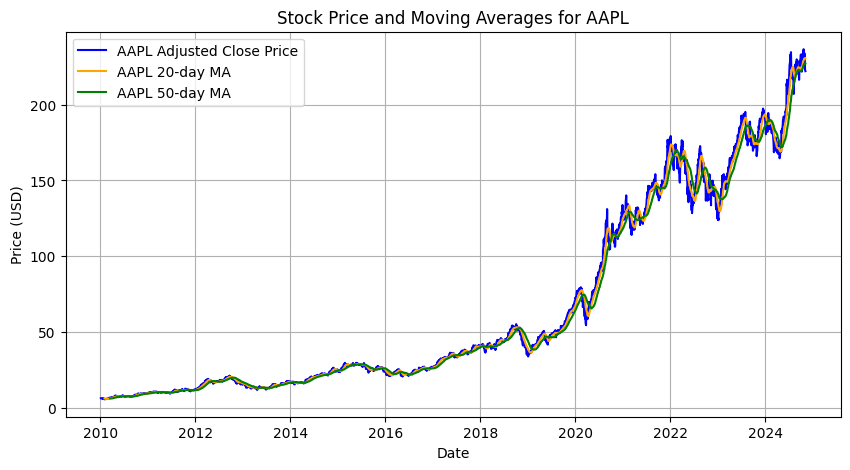

Summary for GOOGL:
Price     Adj Close        Close         High          Low         Open  \
Ticker        GOOGL        GOOGL        GOOGL        GOOGL        GOOGL   
count   3735.000000  3735.000000  3735.000000  3735.000000  3735.000000   
mean      60.040968    60.181919    60.785206    59.555521    60.164780   
std       45.341426    45.435441    45.929808    44.939484    45.420373   
min       10.885709    10.912663    11.068068    10.851602    10.968719   
25%       22.541904    22.597722    22.675925    22.410160    22.529779   
50%       46.890392    47.006500    47.250000    46.695999    47.004501   
75%       90.191673    90.415001    91.374252    89.379997    90.305000   
max      190.926636   191.179993   191.750000   189.029999   190.309998   

Price         Volume Daily Return Moving Average 20 Moving Average 50  \
Ticker         GOOGL                                                    
count   3.735000e+03  3734.000000       3716.000000       3686.000000   
mean    5.6

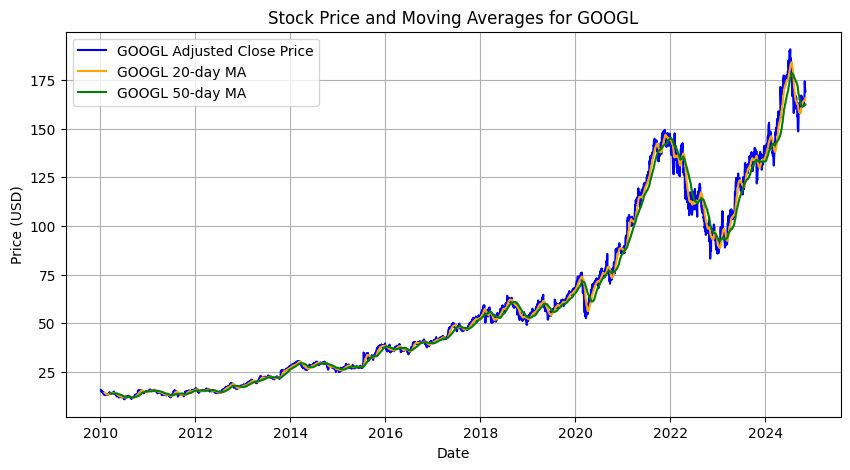

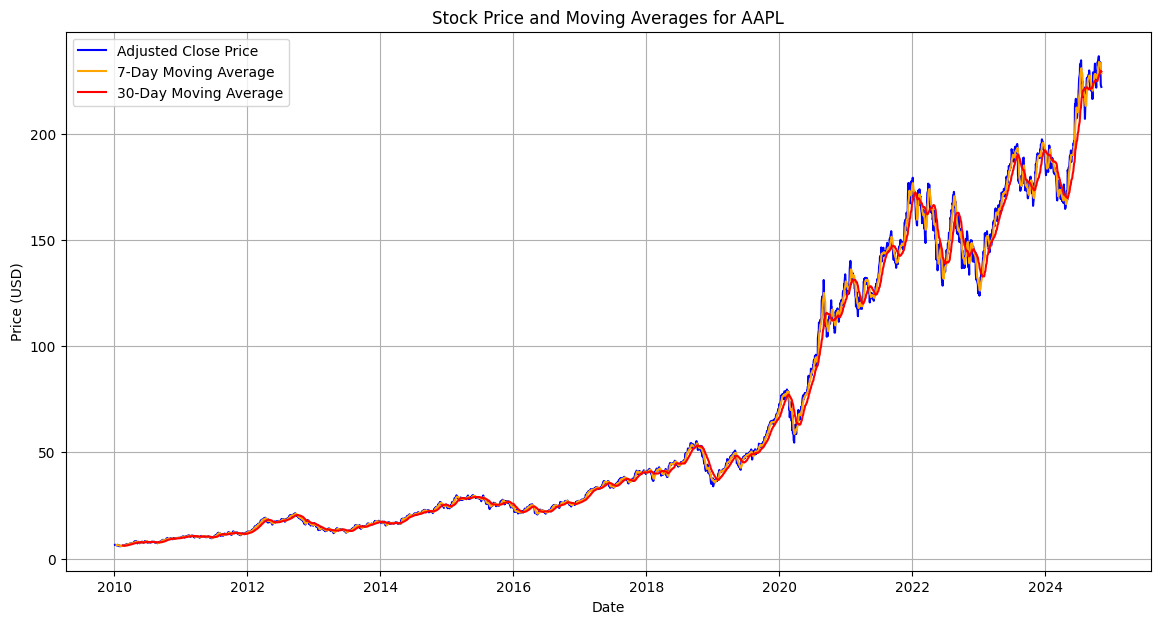

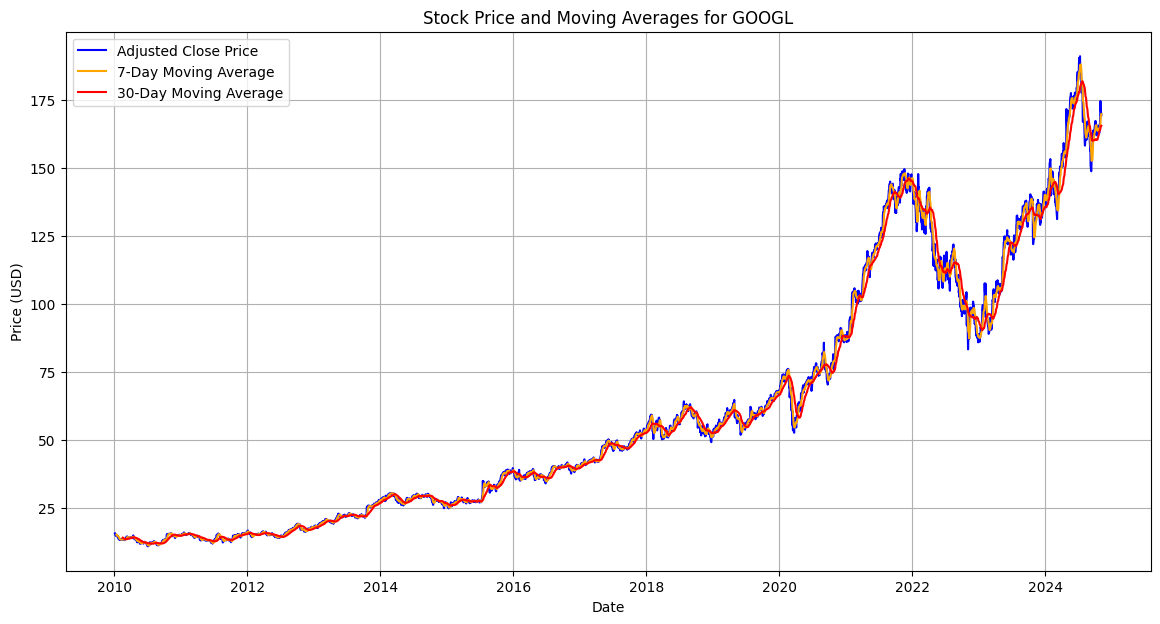

In [12]:
# Week 1: Enhanced Stock Data Acquisition Setup

# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import os

# Step 1: Define Parameters for Data Acquisition
# Specify the stock tickers to fetch data (e.g., Apple, Google, Amazon)
stocks = ["AAPL", "GOOGL"]

# Set a date range to get historical data
start_date = "2010-01-01"
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

# Create a directory to save the data if it doesn't already exist
data_dir = "stock_data"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# Step 2: Define a function to get stock data for a given ticker
def get_stock_data(ticker, start_date, end_date):
    try:
        # Print a message indicating the start of data download for the given ticker
        print(f"Attempting to download data for {ticker} from {start_date} to {end_date}")

        # Download historical market data from Yahoo Finance
        stock_data = yf.download(ticker, start=start_date, end=end_date)

        # Check if the downloaded data is empty
        if stock_data.empty:
            print(f"Warning: No data found for {ticker}. Please check the ticker symbol or date range.")
        else:
            # Print the number of rows of data fetched for the given ticker
            print(f"Successfully downloaded data for {ticker}. Number of rows: {len(stock_data)}")

            # Add new calculated columns for analysis
            stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()  # Calculate daily return
            stock_data['Moving Average 20'] = stock_data['Adj Close'].rolling(window=20).mean()  # 20-day moving average
            stock_data['Moving Average 50'] = stock_data['Adj Close'].rolling(window=50).mean()  # 50-day moving average
            stock_data['7-Day MA'] = stock_data['Adj Close'].rolling(window=7).mean()  # 7-day moving average
            stock_data['30-Day MA'] = stock_data['Adj Close'].rolling(window=30).mean()  # 30-day moving average

            # Save the data as CSV for further analysis
            filename = os.path.join(data_dir, f"{ticker}_stock_data.csv")
            stock_data.to_csv(filename)
            print(f"Data for {ticker} saved successfully to {filename}")

        # Return the fetched data
        return stock_data
    except Exception as e:
        # Print an error message in case of an exception during data fetching
        print(f"An error occurred while fetching data for {ticker}: {e}")
        return None

# Step 3: Fetch data for each stock ticker
if __name__ == "__main__":
    # Create an empty dictionary to store stock data for each ticker
    stock_data_dict = {}

    # Loop through each ticker symbol in the stocks list
    for ticker in stocks:
        print(f"Fetching data for {ticker}...")
        # Call the get_stock_data function to fetch data and store it in the dictionary
        stock_data_dict[ticker] = get_stock_data(ticker, start_date, end_date)
        # Print a completion message for the current ticker
        print(f"Completed fetching data for {ticker}.\n")

    # Display a success message after all tickers have been processed
    print("Stock data fetching completed!")

# Step 4: Display basic information about the fetched data for each stock
for ticker, data in stock_data_dict.items():
    if data is not None:
        # Print a summary of basic statistical information for the fetched data
        print(f"Summary for {ticker}:")
        print(data.describe())

        # Additional visualization for data analysis
        try:
            import matplotlib.pyplot as plt
            plt.figure(figsize=(10, 5))
            plt.plot(data.index, data['Adj Close'], label=f"{ticker} Adjusted Close Price", color='blue')
            plt.plot(data.index, data['Moving Average 20'], label=f"{ticker} 20-day MA", color='orange')
            plt.plot(data.index, data['Moving Average 50'], label=f"{ticker} 50-day MA", color='green')
            plt.title(f"Stock Price and Moving Averages for {ticker}")
            plt.xlabel("Date")
            plt.ylabel("Price (USD)")
            plt.legend()
            plt.grid()
            plt.show()
        except ImportError:
            print("matplotlib is not installed. Please install it to visualize the data.")
    else:
        # Print a message if no data is available for the given ticker
        print(f"No data available for {ticker}, skipping summary.")






# Step 5: Perform Additional Analysis and Visualization
import matplotlib.pyplot as plt

# Plotting closing price and moving averages for each stock
def plot_stock_data(ticker, data):
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Adj Close'], label='Adjusted Close Price', color='blue')
    plt.plot(data.index, data['7-Day MA'], label='7-Day Moving Average', color='orange')
    plt.plot(data.index, data['30-Day MA'], label='30-Day Moving Average', color='red')


    # Ensure the values passed to fill_between are 1-dimensional by using the .to_numpy() method
    # plt.fill_between(data.index, (data['Adj Close'] - data['Volatility']).to_numpy(), (data['Adj Close'] + data['Volatility']).to_numpy(), color='gray', alpha=0.2, label='Volatility')

    plt.title(f"Stock Price and Moving Averages for {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid()
    plt.savefig(os.path.join(output_dir, f"{ticker}_stock_plot.png"))
    plt.show()

# Generate plots for each stock
for ticker, data in stock_data_dict.items():
    if data is not None:
        logging.info(f"Generating plot for {ticker}...")
        plot_stock_data(ticker, data)
        logging.info(f"Plot for {ticker} generated successfully.")





In [13]:
# Week 1: Enhanced Stock Data Acquisition Setup with Latest Data Analysis Trends

# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define Parameters for Data Acquisition
# Specify the stock tickers to fetch data (e.g., Apple, Google, Amazon)
stocks = ["AAPL", "GOOGL", "AMZN", "MSFT", "TSLA"]

# Set a date range to get historical data
start_date = "2020-01-01"
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

# Create a directory to save the data if it doesn't already exist
data_dir = "stock_data"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# Step 2: Define a function to get stock data for a given ticker
def get_stock_data(ticker, start_date, end_date):
    try:
        # Print a message indicating the start of data download for the given ticker
        print(f"Attempting to download data for {ticker} from {start_date} to {end_date}")

        # Download historical market data from Yahoo Finance
        stock_data = yf.download(ticker, start=start_date, end=end_date)

        # Check if the downloaded data is empty
        if stock_data.empty:
            print(f"Warning: No data found for {ticker}. Please check the ticker symbol or date range.")
        else:
            # Print the number of rows of data fetched for the given ticker
            print(f"Successfully downloaded data for {ticker}. Number of rows: {len(stock_data)}")

            # Add new calculated columns for analysis
            stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()  # Calculate daily return
            stock_data['Cumulative Return'] = (1 + stock_data['Daily Return']).cumprod()  # Calculate cumulative return
            stock_data['Moving Average 20'] = stock_data['Adj Close'].rolling(window=20).mean()  # 20-day moving average
            stock_data['Moving Average 50'] = stock_data['Adj Close'].rolling(window=50).mean()  # 50-day moving average
            stock_data['Bollinger High'] = stock_data['Moving Average 20'] + (2 * stock_data['Adj Close'].rolling(window=20).std())  # Bollinger High Band
            stock_data['Bollinger Low'] = stock_data['Moving Average 20'] - (2 * stock_data['Adj Close'].rolling(window=20).std())  # Bollinger Low Band

            # Save the data as CSV for further analysis
            filename = os.path.join(data_dir, f"{ticker}_stock_data.csv")
            stock_data.to_csv(filename)
            print(f"Data for {ticker} saved successfully to {filename}")

        # Return the fetched data
        return stock_data
    except Exception as e:
        # Print an error message in case of an exception during data fetching
        print(f"An error occurred while fetching data for {ticker}: {e}")
        return None

# Step 3: Fetch data for each stock ticker
if __name__ == "__main__":
    # Create an empty dictionary to store stock data for each ticker
    stock_data_dict = {}

    # Loop through each ticker symbol in the stocks list
    for ticker in stocks:
        print(f"Fetching data for {ticker}...")
        # Call the get_stock_data function to fetch data and store it in the dictionary
        stock_data_dict[ticker] = get_stock_data(ticker, start_date, end_date)
        # Print a completion message for the current ticker
        print(f"Completed fetching data for {ticker}.\n")

    # Display a success message after all tickers have been processed
    print("Stock data fetching completed!")

# Step 4: Display basic information about the fetched data for each stock
for ticker, data in stock_data_dict.items():
    if data is not None:
        # Print a summary of basic statistical information for the fetched data
        print(f"Summary for {ticker}:")
        print(data.describe())

        # Additional visualization for data analysis
        try:
            # Set Seaborn style for better visualization
            sns.set(style="whitegrid")

            # Plot Adjusted Close Price, Moving Averages, and Bollinger Bands
            plt.figure(figsize=(14, 7))
            plt.plot(data.index, data['Adj Close'], label=f"{ticker} Adjusted Close Price", color='blue')
            plt.plot(data.index, data['Moving Average 20'], label=f"{ticker} 20-day MA", color='orange')
            plt.plot(data.index, data['Moving Average 50'], label=f"{ticker} 50-day MA", color='green')
            plt.plot(data.index, data['Bollinger High'], label=f"{ticker} Bollinger High", linestyle='--', color='red')
            plt.plot(data.index, data['Bollinger Low'], label=f"{ticker} Bollinger Low", linestyle='--', color='purple')
            plt.fill_between(data.index, data['Bollinger High'], data['Bollinger Low'], color='grey', alpha=0.1)
            plt.title(f"Stock Price, Moving Averages, and Bollinger Bands for {ticker}")
            plt.xlabel("Date")
            plt.ylabel("Price (USD)")
            plt.legend()
            plt.grid(True)
            plt.show()

            # Plot Daily Return Distribution
            plt.figure(figsize=(10, 5))
            sns.histplot(data['Daily Return'].dropna(), bins=100, kde=True, color='blue')
            plt.title(f"Daily Return Distribution for {ticker}")
            plt.xlabel("Daily Return")
            plt.ylabel("Frequency")
            plt.grid(True)
            plt.show()

            # Plot Cumulative Return
            plt.figure(figsize=(10, 5))
            plt.plot(data.index, data['Cumulative Return'], label=f"{ticker} Cumulative Return", color='green')
            plt.title(f"Cumulative Return for {ticker}")
            plt.xlabel("Date")
            plt.ylabel("Cumulative Return")
            plt.legend()
            plt.grid(True)
            plt.show()
        except ImportError:
            print("matplotlib or seaborn is not installed. Please install them to visualize the data.")
    else:
        # Print a message if no data is available for the given ticker
        print(f"No data available for {ticker}, skipping summary.")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for AAPL...
Attempting to download data for AAPL from 2020-01-01 to 2024-11-05
Successfully downloaded data for AAPL. Number of rows: 1219
An error occurred while fetching data for AAPL: Cannot set a DataFrame with multiple columns to the single column Bollinger High
Completed fetching data for AAPL.

Fetching data for GOOGL...
Attempting to download data for GOOGL from 2020-01-01 to 2024-11-05
Successfully downloaded data for GOOGL. Number of rows: 1219
An error occurred while fetching data for GOOGL: Cannot set a DataFrame with multiple columns to the single column Bollinger High
Completed fetching data for GOOGL.

Fetching data for AMZN...
Attempting to download data for AMZN from 2020-01-01 to 2024-11-05



[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for AMZN. Number of rows: 1219
An error occurred while fetching data for AMZN: Cannot set a DataFrame with multiple columns to the single column Bollinger High
Completed fetching data for AMZN.

Fetching data for MSFT...
Attempting to download data for MSFT from 2020-01-01 to 2024-11-05


[*********************100%***********************]  1 of 1 completed

Successfully downloaded data for MSFT. Number of rows: 1219
An error occurred while fetching data for MSFT: Cannot set a DataFrame with multiple columns to the single column Bollinger High
Completed fetching data for MSFT.

Fetching data for TSLA...
Attempting to download data for TSLA from 2020-01-01 to 2024-11-05
Successfully downloaded data for TSLA. Number of rows: 1219
An error occurred while fetching data for TSLA: Cannot set a DataFrame with multiple columns to the single column Bollinger High
Completed fetching data for TSLA.

Stock data fetching completed!
No data available for AAPL, skipping summary.
No data available for GOOGL, skipping summary.
No data available for AMZN, skipping summary.
No data available for MSFT, skipping summary.
No data available for TSLA, skipping summary.


In [7]:
# Week 1: Advanced Stock Data Acquisition Setup

# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# Step 1: Define Parameters for Data Acquisition
# Specify the stock tickers to fetch data (e.g., Apple, Google, Amazon)
stocks = ["AAPL", "TSLA"]

# Set a date range to get historical data
start_date = "2020-01-01"
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

# Create a directory to save the data if it doesn't already exist
data_dir = "stock_data"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# Step 2: Define Data Contract (Schema)
data_contract = {
    "Date": "datetime64[ns]",
    "Open": "float64",
    "High": "float64",
    "Low": "float64",
    "Close": "float64",
    "Adj Close": "float64",
    "Volume": "int64",
    "Daily Return": "float64",
    "Moving Average 20": "float64",
    "Moving Average 50": "float64"
}

# Save the data contract as a JSON file
with open(os.path.join(data_dir, "data_contract.json"), "w") as f:
    json.dump(data_contract, f, indent=4)

# Step 3: Define a function to validate data against the contract
def validate_data(df, contract):
    for column, dtype in contract.items():
        if column not in df.columns:
            print(f"Error: Missing column '{column}' in data.")
            return False
        if df[column].dtype != np.dtype(dtype):
            print(f"Error: Column '{column}' has incorrect type. Expected {dtype}, got {df[column].dtype}.")
            return False
    print("Data validation passed.")
    return True

# Step 4: Define a function to detect anomalies using Isolation Forest
def detect_anomalies(df):
    model = IsolationForest(contamination=0.01)
    df = df.dropna()
    features = df[["Open", "High", "Low", "Close", "Volume"]]
    model.fit(features)
    df["Anomaly"] = model.predict(features)
    anomalies = df[df["Anomaly"] == -1]
    print(f"Detected {len(anomalies)} anomalies.")
    return anomalies

# Step 5: Define a function to get stock data for a given ticker
def get_stock_data(ticker, start_date, end_date):
    try:
        print(f"Attempting to download data for {ticker} from {start_date} to {end_date}")
        stock_data = yf.download(ticker, start=start_date, end=end_date)
        if stock_data.empty:
            print(f"Warning: No data found for {ticker}. Please check the ticker symbol or date range.")
        else:
            print(f"Successfully downloaded data for {ticker}. Number of rows: {len(stock_data)}")
            stock_data["Daily Return"] = stock_data["Adj Close"].pct_change()
            stock_data["Moving Average 20"] = stock_data["Adj Close"].rolling(window=20).mean()
            stock_data["Moving Average 50"] = stock_data["Adj Close"].rolling(window=50).mean()
            if validate_data(stock_data, data_contract):
                anomalies = detect_anomalies(stock_data)
                filename = os.path.join(data_dir, f"{ticker}_stock_data.csv")
                stock_data.to_csv(filename)
                print(f"Data for {ticker} saved successfully to {filename}")
                return stock_data, anomalies
    except Exception as e:
        print(f"An error occurred while fetching data for {ticker}: {e}")
    return None, None

# Step 6: Fetch data for each stock ticker
if __name__ == "__main__":
    stock_data_dict = {}
    anomalies_dict = {}
    for ticker in stocks:
        print(f"Fetching data for {ticker}...")
        data, anomalies = get_stock_data(ticker, start_date, end_date)
        stock_data_dict[ticker] = data
        anomalies_dict[ticker] = anomalies
        print(f"Completed fetching data for {ticker}.\n")
    print("Stock data fetching completed!")

# Step 7: Display basic information and visualizations for each stock
for ticker, data in stock_data_dict.items():
    if data is not None:
        print(f"Summary for {ticker}:")
        print(data.describe())
        plt.figure(figsize=(14, 7))
        sns.lineplot(data=data[["Adj Close", "Moving Average 20", "Moving Average 50"]])
        plt.title(f"{ticker} Stock Price and Moving Averages")
        plt.xlabel("Date")
        plt.ylabel("Price (USD)")
        plt.legend(["Adjusted Close", "20-day MA", "50-day MA"])
        plt.grid()
        plt.show()
        if anomalies_dict[ticker] is not None and not anomalies_dict[ticker].empty:
            print(f"Anomalies detected in {ticker}:")
            print(anomalies_dict[ticker][["Open", "High", "Low", "Close", "Volume"]])
    else:
        print(f"No data available for {ticker}, skipping summary.")


Fetching data for AAPL...
Attempting to download data for AAPL from 2020-01-01 to 2024-11-05


[*********************100%***********************]  1 of 1 completed


Successfully downloaded data for AAPL. Number of rows: 1219
Error: Missing column 'Date' in data.
Completed fetching data for AAPL.

Fetching data for TSLA...
Attempting to download data for TSLA from 2020-01-01 to 2024-11-05


[*********************100%***********************]  1 of 1 completed

Successfully downloaded data for TSLA. Number of rows: 1219
Error: Missing column 'Date' in data.
Completed fetching data for TSLA.

Stock data fetching completed!
No data available for AAPL, skipping summary.
No data available for TSLA, skipping summary.


In [8]:
# Week 1: Robust Stock Data Acquisition Setup with Latest Data Analysis Trends

# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Define Parameters for Data Acquisition
# Specify the stock tickers to fetch data (e.g., Apple, Google, Amazon)
stocks = ["AAPL", "TSLA"]

# Set a date range to get historical data
start_date = "2020-01-01"
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

# Create a directory to save the data if it doesn't already exist
data_dir = "stock_data"
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# Step 2: Define a function to get stock data for a given ticker
def get_stock_data(ticker, start_date, end_date):
    try:
        # Print a message indicating the start of data download for the given ticker
        print(f"Attempting to download data for {ticker} from {start_date} to {end_date}")

        # Download historical market data from Yahoo Finance
        stock_data = yf.download(ticker, start=start_date, end=end_date)

        # Check if the downloaded data is empty
        if stock_data.empty:
            print(f"Warning: No data found for {ticker}. Please check the ticker symbol or date range.")
        else:
            # Print the number of rows of data fetched for the given ticker
            print(f"Successfully downloaded data for {ticker}. Number of rows: {len(stock_data)}")

            # Add new calculated columns for analysis
            stock_data['Daily Return'] = stock_data['Adj Close'].pct_change()  # Calculate daily return
            stock_data['Cumulative Return'] = (1 + stock_data['Daily Return']).cumprod()  # Calculate cumulative return
            stock_data['Moving Average 20'] = stock_data['Adj Close'].rolling(window=20).mean()  # 20-day moving average
            stock_data['Moving Average 50'] = stock_data['Adj Close'].rolling(window=50).mean()  # 50-day moving average
            stock_data['Bollinger High'] = stock_data['Moving Average 20'] + (2 * stock_data['Adj Close'].rolling(window=20).std())  # Bollinger High Band
            stock_data['Bollinger Low'] = stock_data['Moving Average 20'] - (2 * stock_data['Adj Close'].rolling(window=20).std())  # Bollinger Low Band

            # Save the data as CSV for further analysis
            filename = os.path.join(data_dir, f"{ticker}_stock_data.csv")
            stock_data.to_csv(filename)
            print(f"Data for {ticker} saved successfully to {filename}")

        # Return the fetched data
        return stock_data
    except Exception as e:
        # Print an error message in case of an exception during data fetching
        print(f"An error occurred while fetching data for {ticker}: {e}")
        return None

# Step 3: Fetch data for each stock ticker
if __name__ == "__main__":
    # Create an empty dictionary to store stock data for each ticker
    stock_data_dict = {}

    # Loop through each ticker symbol in the stocks list
    for ticker in stocks:
        print(f"Fetching data for {ticker}...")
        # Call the get_stock_data function to fetch data and store it in the dictionary
        stock_data_dict[ticker] = get_stock_data(ticker, start_date, end_date)
        # Print a completion message for the current ticker
        print(f"Completed fetching data for {ticker}.\n")

    # Display a success message after all tickers have been processed
    print("Stock data fetching completed!")

# Step 4: Display basic information about the fetched data for each stock
for ticker, data in stock_data_dict.items():
    if data is not None:
        # Print a summary of basic statistical information for the fetched data
        print(f"Summary for {ticker}:")
        print(data.describe())

        # Additional visualization for data analysis
        try:
            # Set Seaborn style for better visualization
            sns.set(style="whitegrid")

            # Plot Adjusted Close Price, Moving Averages, and Bollinger Bands
            plt.figure(figsize=(14, 7))
            plt.plot(data.index, data['Adj Close'], label=f"{ticker} Adjusted Close Price", color='blue')
            plt.plot(data.index, data['Moving Average 20'], label=f"{ticker} 20-day MA", color='orange')
            plt.plot(data.index, data['Moving Average 50'], label=f"{ticker} 50-day MA", color='green')
            plt.plot(data.index, data['Bollinger High'], label=f"{ticker} Bollinger High", linestyle='--', color='red')
            plt.plot(data.index, data['Bollinger Low'], label=f"{ticker} Bollinger Low", linestyle='--', color='purple')
            plt.fill_between(data.index, data['Bollinger High'], data['Bollinger Low'], color='grey', alpha=0.1)
            plt.title(f"Stock Price, Moving Averages, and Bollinger Bands for {ticker}")
            plt.xlabel("Date")
            plt.ylabel("Price (USD)")
            plt.legend()
            plt.grid(True)
            plt.show()

            # Plot Daily Return Distribution
            plt.figure(figsize=(10, 5))
            sns.histplot(data['Daily Return'].dropna(), bins=100, kde=True, color='blue')
            plt.title(f"Daily Return Distribution for {ticker}")
            plt.xlabel("Daily Return")
            plt.ylabel("Frequency")
            plt.grid(True)
            plt.show()

            # Plot Cumulative Return
            plt.figure(figsize=(10, 5))
            plt.plot(data.index, data['Cumulative Return'], label=f"{ticker} Cumulative Return", color='green')
            plt.title(f"Cumulative Return for {ticker}")
            plt.xlabel("Date")
            plt.ylabel("Cumulative Return")
            plt.legend()
            plt.grid(True)
            plt.show()
        except ImportError:
            print("matplotlib or seaborn is not installed. Please install them to visualize the data.")
    else:
        # Print a message if no data is available for the given ticker
        print(f"No data available for {ticker}, skipping summary.")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Fetching data for AAPL...
Attempting to download data for AAPL from 2020-01-01 to 2024-11-05
Successfully downloaded data for AAPL. Number of rows: 1219
An error occurred while fetching data for AAPL: Cannot set a DataFrame with multiple columns to the single column Bollinger High
Completed fetching data for AAPL.

Fetching data for TSLA...
Attempting to download data for TSLA from 2020-01-01 to 2024-11-05
Successfully downloaded data for TSLA. Number of rows: 1219
An error occurred while fetching data for TSLA: Cannot set a DataFrame with multiple columns to the single column Bollinger High
Completed fetching data for TSLA.

Stock data fetching completed!
No data available for AAPL, skipping summary.
No data available for TSLA, skipping summary.
